# 导入工具包

In [13]:
# 图数据挖掘
import networkx as nx

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
import numpy as np

# 创建图

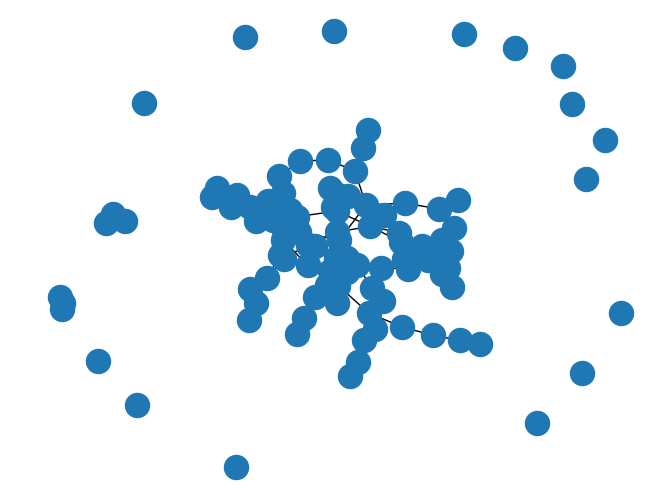

In [3]:
G=nx.gnp_random_graph(100,0.02,seed=10374196)
pos=nx.spring_layout(G,seed=10)
nx.draw(G,pos=pos,with_labels=False)

# 最大连通域子图

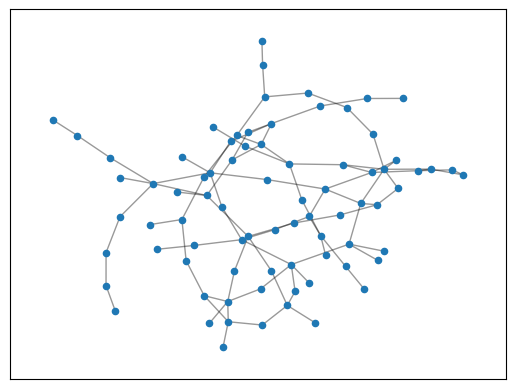

In [4]:
Gcc=G.subgraph(max(nx.connected_components(G),key=len))
pos=nx.spring_layout(Gcc,seed=10396953)
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

In [6]:
nx.draw_networkx?

Signature: nx.draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
Docstring:
Draw the graph G using Matplotlib.

Draw the graph with Matplotlib with options for node positions,
labeling, titles, and many other drawing features.
See draw() for simple drawing without labels or axes.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

arrows : bool or None, optional (default=None)
    If `None`, directed graphs draw arrowheads with
    `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
    via `~matplotlib.collections.LineCollection` for speed.
    If `True`, draw arrowheads with FancyArrowPatches (bendable and stylish).
    If `False`, draw edges using LineCollection (linear and fast).
    For directed graph

# 美化

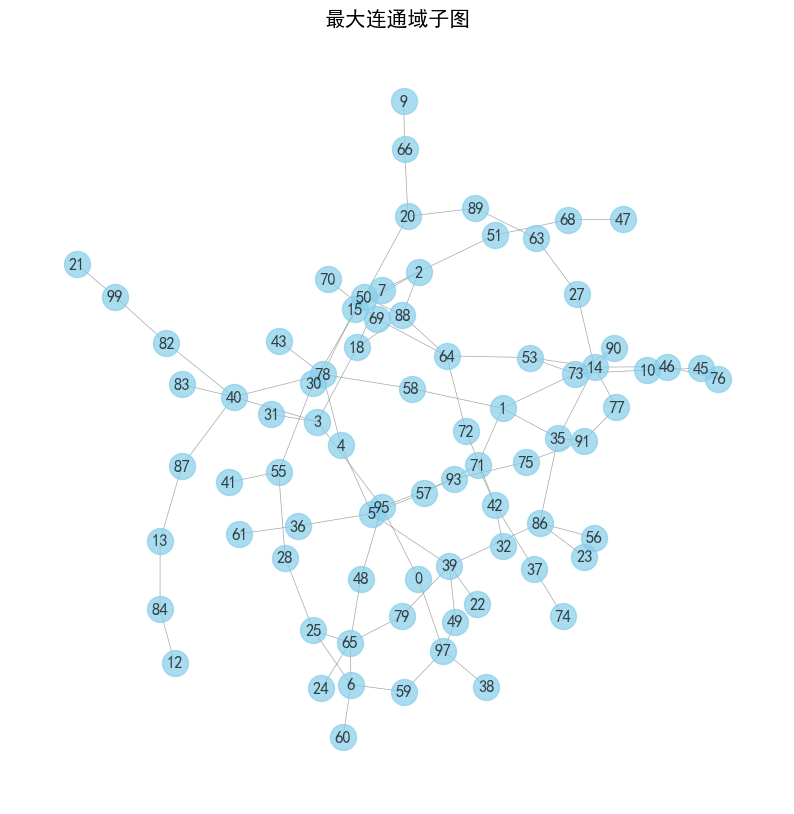

In [8]:
plt.figure(figsize=(10,10))
pos=nx.spring_layout(Gcc,seed=10396953)
options={
    "node_color":"skyblue",
    "node_size":350,
    "edge_color":"gray",
    "width":0.5,
    "alpha":0.7,
}
nx.draw_networkx(Gcc,pos=pos,**options)
plt.title("最大连通域子图",fontsize=15)
plt.axis("off")
plt.show()

# 每个节点连接数

In [9]:
G.degree()

DegreeView({0: 2, 1: 4, 2: 4, 3: 4, 4: 2, 5: 4, 6: 4, 7: 2, 8: 2, 9: 1, 10: 3, 11: 0, 12: 1, 13: 2, 14: 6, 15: 2, 16: 0, 17: 0, 18: 3, 19: 1, 20: 3, 21: 1, 22: 1, 23: 1, 24: 1, 25: 3, 26: 0, 27: 2, 28: 2, 29: 0, 30: 2, 31: 1, 32: 1, 33: 0, 34: 1, 35: 4, 36: 2, 37: 2, 38: 1, 39: 5, 40: 5, 41: 1, 42: 4, 43: 1, 44: 0, 45: 2, 46: 3, 47: 1, 48: 2, 49: 2, 50: 3, 51: 2, 52: 0, 53: 3, 54: 0, 55: 3, 56: 1, 57: 2, 58: 2, 59: 2, 60: 1, 61: 1, 62: 0, 63: 2, 64: 4, 65: 5, 66: 2, 67: 0, 68: 2, 69: 2, 70: 1, 71: 3, 72: 2, 73: 4, 74: 1, 75: 2, 76: 2, 77: 2, 78: 5, 79: 2, 80: 0, 81: 1, 82: 2, 83: 1, 84: 2, 85: 0, 86: 4, 87: 2, 88: 4, 89: 2, 90: 2, 91: 3, 92: 0, 93: 2, 94: 0, 95: 4, 96: 1, 97: 4, 98: 0, 99: 2})

In [10]:
# 排序
degree_sequence=sorted([d for n,d in G.degree()],reverse=True)
degree_sequence

[6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

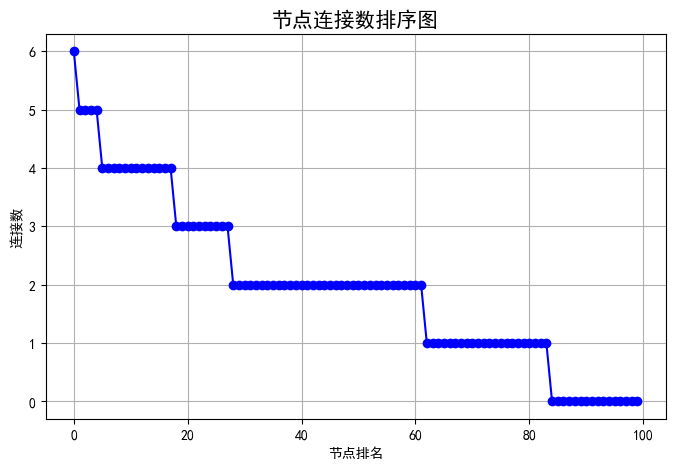

In [11]:
# RankPlot
plt.figure(figsize=(8,5))
plt.plot(degree_sequence,'b-',marker='o')
plt.title("节点连接数排序图", fontsize=15)
plt.xlabel("节点排名")
plt.ylabel("连接数")
plt.grid(True)
plt.show()

# 节点Degree直方图

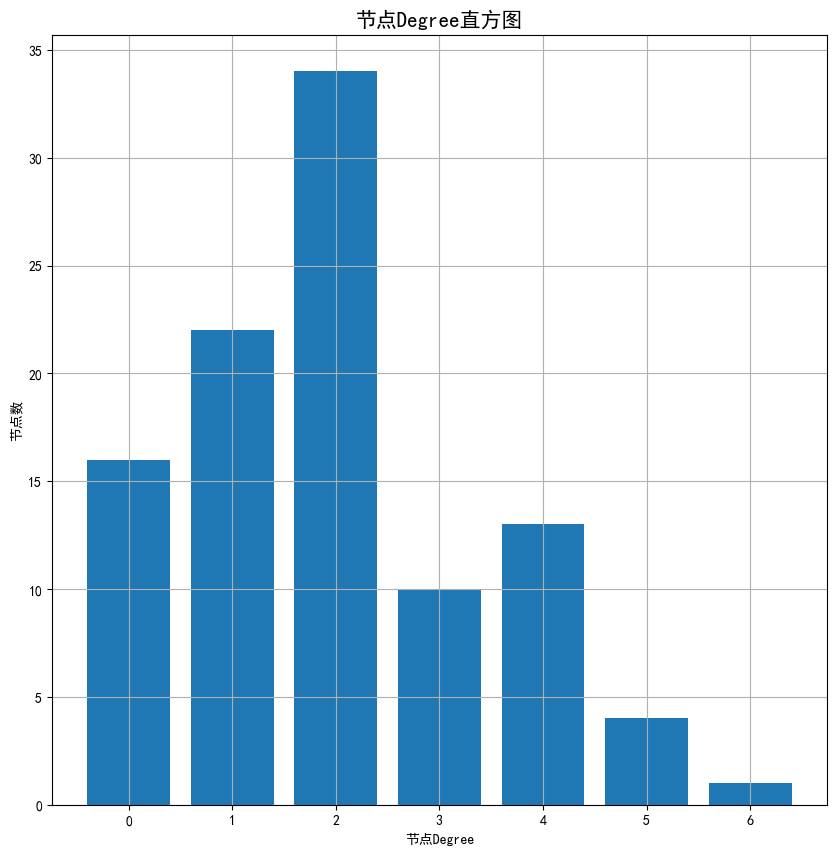

In [16]:
plt.figure(figsize=(10,10))
plt.bar(*np.unique(degree_sequence,return_counts=True))
plt.title("节点Degree直方图", fontsize=15)
plt.xlabel("节点Degree")
plt.ylabel("节点数")
plt.grid(True)
plt.show()